In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from main import get_keywords, get_searchWords
import config
import tweepy
import pandas as pd
import seaborn as sb
from datetime import timedelta

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
def get_hashtags(tweet):
    HT = tweet.entities['hashtags']
    if len(HT) != 0:
        return [T['text'] for T in HT]
    return None

def get_usermentions(tweet):
    HT = tweet.entities['user_mentions']
    if len(HT) != 0:
        return [T['screen_name'] for T in HT]
    return None

In [3]:
# AUTH #
auth = tweepy.OAuthHandler(config.CONSUMER_KEY, config.CONSUMER_SECRET)
auth.set_access_token(config.ACCESS_TOKEN, config.ACCESS_TOKEN_SECRET)

In [4]:
# API #
api = tweepy.API(auth)

In [5]:
# Parametros de busqueda #
search_words = get_searchWords()
date_since = "2019-10-16"

In [6]:
# CURSOR #
tweets = tweepy.Cursor(api.search,
                        q=search_words,
                        lang='es',
                        since=date_since).items(500)

In [7]:
# PROCESSING #
tweets_list = [tweet for tweet in tweets]

users_locs = [[h.created_at, h.user.screen_name, get_usermentions(h), get_hashtags(h), h.user.location] for h in tweets_list]

In [8]:
# DATAFRAME #
twitter_df = pd.DataFrame(data=users_locs,
                              columns=['time', 'user', 'user_mentions', 'hashtags', "location"])
twitter_df['time'] += timedelta(hours=-3)

<IPython.core.display.Javascript object>


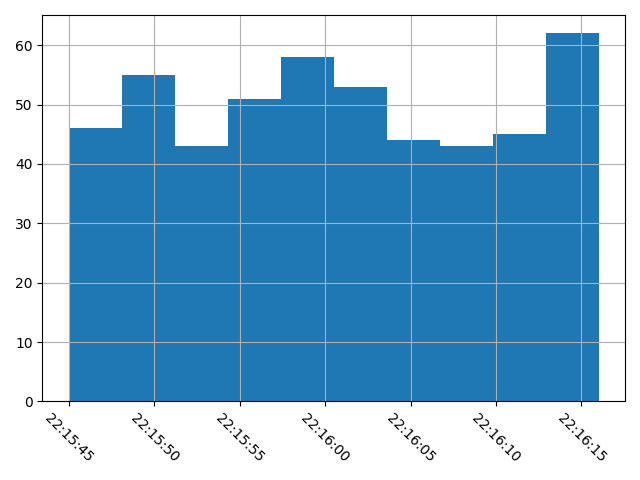

In [9]:
twitter_df['time'].hist()
plt.xticks(rotation=-45)
plt.tight_layout()

In [12]:
twitter_df['user']

KeyError: False